# Summary

This file is a continuation of the previous file, in the first file we setup the basic skeleton of the neural network.

Now, we want to get closer to our target.

First, we try to reduce the number of parameters. In order to do that, we need to structure the neural network in such a way that the model is learning more lesser parameters.

In the next file, we will try to achieve a consistent accuracy of more than 99.4% or higher with the parameters reduction we get in this file.


**Target**


1.   Reduce the number of parameters and get it to 10K-20K range


**Result**

*   Total Model Parameters :  12584 i.e. ~12.6K
*   Best Train Accuracy :  100.0
*   Best Test Accuracy :  98.63
*   Number of Epochs with test accuracy above 99.4% threshold: 0


**Analysis**


1.   Cut down the parameters from 6.4M to 12.6K
2.   The Test accuracy never crossed the required threshold of 99.4%
3.   Model hit the highest train accuracy of 100%, that means there's some element of overfitting in the training phase
4.   By changing the convolution layer channels we were able to reduce the number of parameters and bought it down to 12.6K but it impacted our test accuracy which never reached 99%
5.   Too many layers were involved in this round, maybe we should cut down on the number of layers and include the padding element which we had in the first stage
6.   We never addressed the overfitting aspect discusssed in the first file, that needs to be catered to



## Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# We use this experimental data to identify the mean and std dev of the dataset

# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


## Data Import & transformation

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


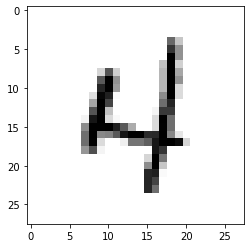

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


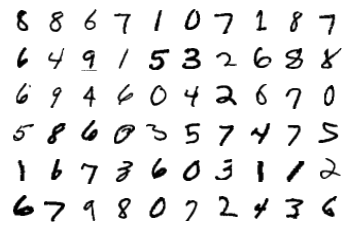

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Model

Defining the model & Initialising it

In [ ]:
# We change the way we define the neural network. Earlier we used to work one convolution layer at a time, now we'll add more operations on top of the convolution layer
# All of this will fall under 1 block.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
        ) # Input - 28 x 28 x 1 | Output - 26 x 26 x 4 | RF - 3 | Kernel - 3 x 3 x 1 x 4

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 26 x 26 x 4 | Output - 24 x 24 x 8 | RF - 5 | Kernel - 3 x 3 x 4 x 8
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 24 x 24 x 8 | Output - 22 x 22 x 16 | RF - 7 | Kernel - 3 x 3 x 8 x 16
        # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        # Input - 22 x 22 x 16 | Output - 11 x 11 x 16 | RF - 14 | Kernel - 2 x 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 11 x 11 x 16 | Output - 11 x 11 x 8 | RF - 14 | Kernel - 1 x 1 x 16 x 8
        # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 11 x 11 x 8 | Output - 9 x 9 x 16 | RF - 16 | Kernel - 3 x 3 x 8 x 16
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 9 x 9 x 16 | Output - 7 x 7 x 32 | RF - 18 | Kernel - 3 x 3 x 16 x 32

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # Input - 7 x 7 x 32 | Output - 7 x 7 x 10 | RF - 18 | Kernel - 1 x 1 x 32 x 10
        # output_size = 7
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # Input - 7 x 7 x 10 | Output - 1 x 1 x 10 | RF - 24 | Kernel - 7 x 7 x 10 x 10
        # output_size = 1 7x7x10 | 7x7x10x10 | 1x1x10

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## Model Parameters

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
            Conv2d-3            [-1, 8, 24, 24]             288
              ReLU-4            [-1, 8, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           1,152
              ReLU-6           [-1, 16, 22, 22]               0
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8            [-1, 8, 11, 11]             128
              ReLU-9            [-1, 8, 11, 11]               0
           Conv2d-10             [-1, 16, 9, 9]           1,152
             ReLU-11             [-1, 16, 9, 9]               0
           Conv2d-12             [-1, 32, 7, 7]           4,608

## Training & Testing the Neural Network

Run the model and check 

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

## Testing our model

In [ ]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.078705795109272 Batch_id=468 Accuracy=71.50: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.1263, Accuracy: 9636/10000 (96.36%)

EPOCH: 1


Loss=0.03506684675812721 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:14<00:00, 32.03it/s]



Test set: Average loss: 0.0787, Accuracy: 9746/10000 (97.46%)

EPOCH: 2


Loss=0.07134709507226944 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:12<00:00, 37.78it/s]



Test set: Average loss: 0.0715, Accuracy: 9777/10000 (97.77%)

EPOCH: 3


Loss=0.06743163615465164 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:12<00:00, 37.56it/s]



Test set: Average loss: 0.0746, Accuracy: 9769/10000 (97.69%)

EPOCH: 4


Loss=0.05201654136180878 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:17<00:00, 26.89it/s]



Test set: Average loss: 0.0526, Accuracy: 9837/10000 (98.37%)

EPOCH: 5


Loss=0.06939566880464554 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:15<00:00, 29.44it/s]



Test set: Average loss: 0.0527, Accuracy: 9833/10000 (98.33%)

EPOCH: 6


Loss=0.04761185869574547 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:16<00:00, 28.13it/s]



Test set: Average loss: 0.0535, Accuracy: 9845/10000 (98.45%)

EPOCH: 7


Loss=0.042773663997650146 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:16<00:00, 28.58it/s]



Test set: Average loss: 0.0434, Accuracy: 9860/10000 (98.60%)

EPOCH: 8


Loss=0.027462154626846313 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:15<00:00, 31.21it/s]



Test set: Average loss: 0.0550, Accuracy: 9832/10000 (98.32%)

EPOCH: 9


Loss=0.005954619497060776 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:13<00:00, 35.35it/s]



Test set: Average loss: 0.0487, Accuracy: 9831/10000 (98.31%)

EPOCH: 10


Loss=0.0034651767928153276 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:16<00:00, 29.14it/s]



Test set: Average loss: 0.0448, Accuracy: 9855/10000 (98.55%)

EPOCH: 11


Loss=0.04585545137524605 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]



Test set: Average loss: 0.0463, Accuracy: 9858/10000 (98.58%)

EPOCH: 12


Loss=0.052119627594947815 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:13<00:00, 34.95it/s]



Test set: Average loss: 0.0538, Accuracy: 9858/10000 (98.58%)

EPOCH: 13


Loss=0.011844637803733349 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:13<00:00, 35.05it/s]



Test set: Average loss: 0.0536, Accuracy: 9845/10000 (98.45%)

EPOCH: 14


Loss=0.016106074675917625 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:15<00:00, 29.79it/s]



Test set: Average loss: 0.0473, Accuracy: 9854/10000 (98.54%)

EPOCH: 15


Loss=0.0016810735687613487 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:13<00:00, 35.94it/s]



Test set: Average loss: 0.0564, Accuracy: 9846/10000 (98.46%)

EPOCH: 16


Loss=0.06825549900531769 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:12<00:00, 36.95it/s]



Test set: Average loss: 0.0476, Accuracy: 9853/10000 (98.53%)

EPOCH: 17


Loss=0.004373900592327118 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:12<00:00, 37.68it/s]



Test set: Average loss: 0.0452, Accuracy: 9849/10000 (98.49%)

EPOCH: 18


Loss=0.0213080495595932 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:12<00:00, 36.79it/s]



Test set: Average loss: 0.0502, Accuracy: 9863/10000 (98.63%)

EPOCH: 19


Loss=0.04437408223748207 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 34.35it/s]



Test set: Average loss: 0.0453, Accuracy: 9858/10000 (98.58%)



In [ ]:
import numpy as np
t = [t.cpu().item() for t in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

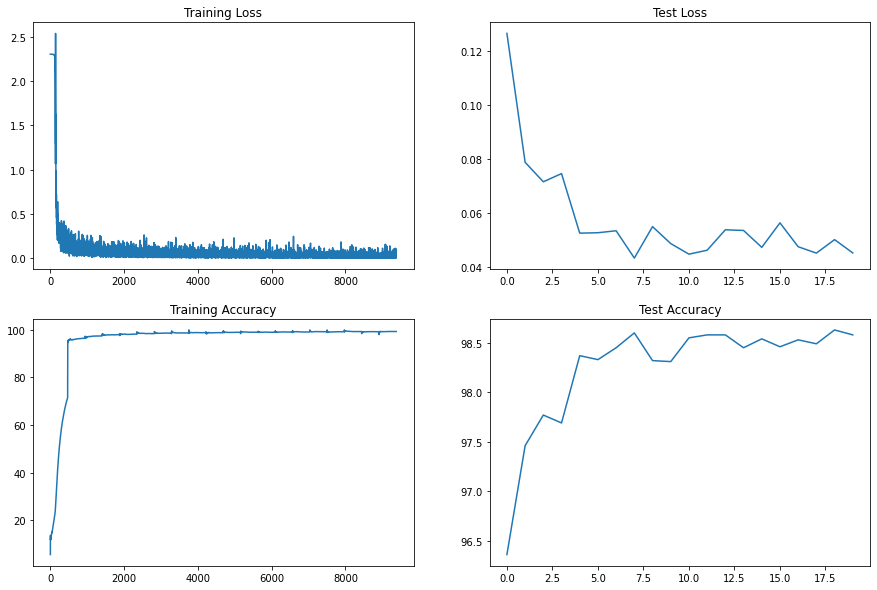

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

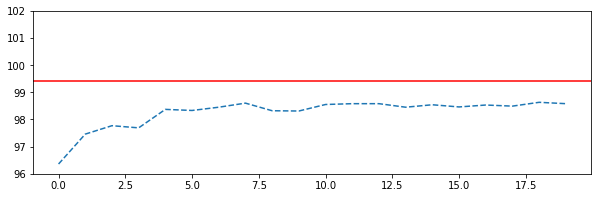

In [ ]:
ymin = 96
ymax = 102
plt.figure(figsize=(10, 3))
#plt.plot(train_acc, label = 'train_acc', linestyle = "--")
plt.plot(test_acc, label = 'test_acc', linestyle = "--")
plt.axhline(y=99.4, color='r', linestyle='-')
plt.ylim(ymin, ymax)
plt.show()

In [ ]:
print('Total Model Parameters : ', sum(p.numel() for p in model.parameters()))
print('Best Train Accuracy : ', max(train_acc))
print('Best Test Accuracy : ', max(test_acc))
x = [x for x in test_acc if x >= 99.4]
print('# of Epochs with test accuracy above 99.4% threshold:', len(x))

Total Model Parameters :  12584
Best Train Accuracy :  100.0
Best Test Accuracy :  98.63
# of Epochs with test accuracy above 99.4% threshold: 0
